In [153]:
# Create the StandardScaler() object to standardize the data
scaler = StandardScaler()
# Create the PCA object
pca = PCA()
# Create the DecisionTreeClassifier object
dt = DecisionTreeClassifier()

In [154]:
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('pca',pca),('dt',dt)])

In [155]:
# Set the number of components to be used in the PCA
n_components = np.arange(2,20,4)
# Set the max_depth to be used in the DecisionTreeClassifier
max_depth = np.arange(2,20,4)
params = {'pca__n_components':n_components,'dt__max_depth':max_depth}

In [156]:
# Create the GridSearchCV object and set the parameters to be used in the GridSearchCV object and cross-validation to be used in the GridSearchCV object
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 10,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer

In [157]:
# Fit the GridSearchCV object to the training data
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': array([ 2,  6, 10, 14, 18]),
                         'pca__n_components': array([ 2,  6, 10, 14, 18])},
             scoring='roc_auc', verbose=10)

In [158]:
# Get the best estimator from the GridSearchCV object
best_est = grid.best_estimator_
best_est

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('dt', DecisionTreeClassifier(max_depth=6))])

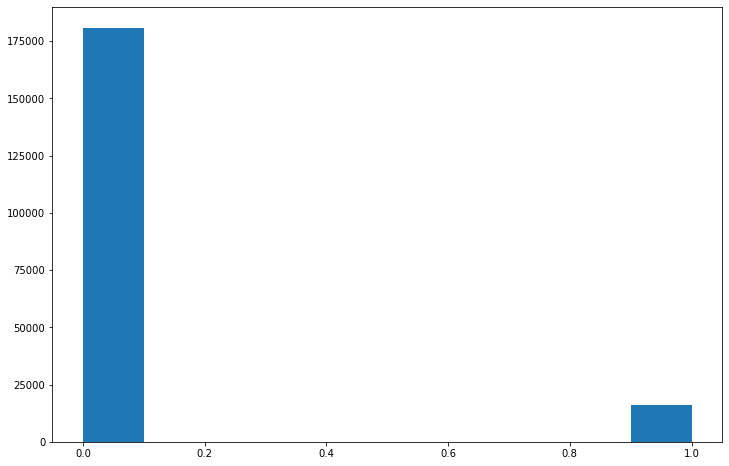

In [159]:
plt.figure(figsize=(12,8))
plt.hist(y_train)
plt.show()

2## Ensemble Methods